In [2]:
import torch
from ay98.neural_net import PATH_TO_DATA
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nn = torch.load('test.pkl')

In [3]:
in_keys = ['f_SPIRE250']
in_err_keys = ['ferr_SPIRE250']
out_err_keys = ['Mstar_best_err']
out_keys = ['Mstar_best']
all_photo = np.array(fits.open(os.path.join(PATH_TO_DATA, 'photometry/es1_photcat.v1.fits'))[1].data)
all_cat = np.array(fits.open(os.path.join(PATH_TO_DATA, 'sed_catalog/es1.v1.fits'))[1].data)
photo_err = all_photo[in_err_keys]
cat_err = all_cat[out_err_keys]
photo = all_photo[in_keys]
cat = all_cat[out_keys]
n_obs = len(cat)





######################## PRE PROCESSING ########################
photo = np.atleast_2d(photo.astype(float)).T
photo_err = np.atleast_2d(photo_err.astype(float)).T
cat = np.atleast_2d(cat.astype(float)).T

In [14]:
print(np.nanmax(cat)/ 1E13) 

2.619891612324527


Text(0.5, 0, 'log(M*)')

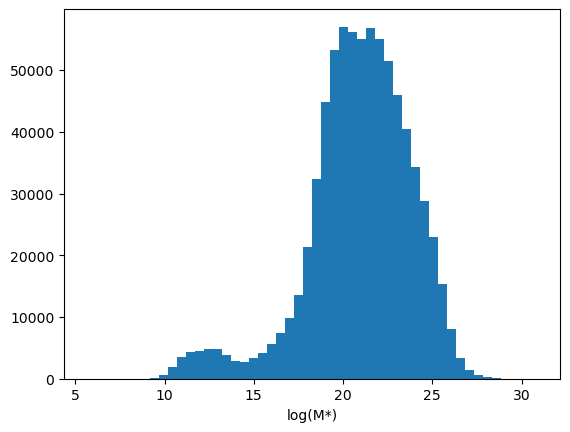

In [16]:
plt.hist(np.log(cat), bins=50)
plt.xlabel('log(M*)')

In [18]:
"""Get given fields in a numpy array from fits file path"""
columns = ['Mstar_best', 'Mstar_gal']
fits_data = np.array(fits.open(os.path.join(PATH_TO_DATA, 'sed_catalog/es1.v1.fits'))[1].data)[columns]

In [37]:
for col in columns:
    fits_data[col] = fits_data[col] / 10
    print(fits_data[col])    

[6.44485922e+06 7.26737533e+06            nan ... 2.51361568e+07
 8.52507253e+06 2.06444349e+04]
[6.44485922e+06 7.26737533e+06            nan ... 2.51361568e+07
 8.52507253e+06 2.06444349e+04]


In [76]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import h5py as h5
import torch

from pathlib import Path
from logger import get_clean_logger
from typing import List, Union, Callable, Optional
from torch import nn
from astropy.io import fits
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer


def get_np_data_from_fits(filepath: Union[str, Path], columns: list, transforms: List[Union[None, Callable]], vector_key: Optional[str] = None):
    """Get given fields in a numpy array from fits file path. Apply given transforms to the data. Return a vector of a column if given."""
    fits_data = np.array(fits.open(os.path.join(PATH_TO_DATA, filepath))[1].data)[:10000]

    # Transform the data
    out_arr = np.empty((len(fits_data[columns[0]]), len(columns)))
    for i, (col, trans) in enumerate(zip(columns, transforms)):
        print(col)
        fits_data[col] = impute(fits_data[col].reshape(-1, 1)).flatten()
        if trans is not None:
            fits_data[col] = trans(fits_data[col])
        out_arr[:, i] = fits_data[col]
    
    # If given vector key, return vector as well as data
    if vector_key is not None:
        return out_arr, fits_data[[vector_key]]
    return out_arr


def impute(data: np.ndarray) -> np.ndarray:
    imputer = KNNImputer(n_neighbors=2)
    return imputer.fit_transform(data)

In [5]:

######################## IMPORT DATA ########################
in_keys = ['f_MIPS24', 'f_MIPS70', 'f_MIPS160', 'f_PACS100', 'f_PACS160', 'f_SPIRE250', 'f_SPIRE350', 'f_SPIRE500']
in_err_keys = [f'ferr{in_k[1:]}' for in_k in in_keys]
in_transforms = [None for _ in range(len(in_keys))]
out_err_keys = ['Mstar_best_err']
out_keys = ['Mstar_best']
out_transforms = [lambda x: np.log(x)]
out_err_tranforms = [lambda x: np.abs(np.atleast_2d(x)).T / cat]

In [65]:
photo, photo_ids = get_np_data_from_fits(os.path.join(PATH_TO_DATA, 'photometry/es1_photcat.v1.fits'), in_keys, transforms=in_transforms, vector_key='Tractor_ID')

f_MIPS24
0 0.268632847864792 <class 'numpy.float64'>
1 0.015851038932800293 <class 'numpy.float64'>
2 0.4495947269001095 <class 'numpy.float64'>
3 0.2728318470009729 <class 'numpy.float64'>
4 0.24622782069265528 <class 'numpy.float64'>
5 0.22371964776782843 <class 'numpy.float64'>
6 0.4250567169204561 <class 'numpy.float64'>
7 0.3946009801795005 <class 'numpy.float64'>
8 0.33769490204749436 <class 'numpy.float64'>
9 0.3620335806956365 <class 'numpy.float64'>
10 0.6599083628169151 <class 'numpy.float64'>
11 0.2571397316760461 <class 'numpy.float64'>
12 0.19009957885742187 <class 'numpy.float64'>
13 0.03637930679321289 <class 'numpy.float64'>
14 0.04044154739379883 <class 'numpy.float64'>
15 0.09842155456542968 <class 'numpy.float64'>
16 0.1572725067138672 <class 'numpy.float64'>
17 0.18168046906887192 <class 'numpy.float64'>
18 0.02373291015625 <class 'numpy.float64'>
19 0.28085673599982613 <class 'numpy.float64'>
20 0.1182073736412549 <class 'numpy.float64'>
21 0.18921146766961622 <cla

KeyboardInterrupt: 

In [ ]:
fits_data = np.array(fits.open(os.path.join(PATH_TO_DATA, os.path.join(PATH_TO_DATA, 'photometry/es1_photcat.v1.fits')))[1].data)
test = fits_data['f_MIPS24']
print(type(test[156]))
print(test[156])
print(test[156] is np.nan)
print(test[156] is np.NaN)
print(len(test[np.isnan(test) == True]))
test[np.isnan(test) == True] = np.nan
print(type(test[156]))
print(test[156])
print(test[156] is np.nan)
print(test[156] is np.NaN)
fits_data['f_MIPS24'] = impute(fits_data['f_MIPS24'][:1000].reshape(-1, 1)).reshape(1, -1)

<class 'numpy.float64'>
nan
False
False
31174
<class 'numpy.float64'>
nan
False
False


In [10]:
def get_np_data_from_fits(filepath: Union[str, Path], columns: list, transforms: List[Union[None, Callable]], vector_key: Optional[str] = None):
    """Get given fields in a numpy array from fits file path. Apply given transforms to the data. Return a vector of a column if given."""
    fits_data = np.array(fits.open(os.path.join(PATH_TO_DATA, filepath))[1].data)[:10000]
    # fits_data = impute(fits_data)

    # Transform the data
    for col, trans in zip(columns, transforms):
        print(col)
        fits_data[col] = impute(fits_data[col].reshape(-1, 1)).flatten()
        if trans is not None:
            fits_data[col] = trans(fits_data[col])
    
    # If given vector key, return vector as well as data
    if vector_key is not None:
        return fits_data[columns].reshape(-1, 1), fits_data[[vector_key]]
    return fits_data[columns].reshape(-1, 1)

In [46]:
fits_data = np.array(fits.open(os.path.join(PATH_TO_DATA, os.path.join(PATH_TO_DATA, 'photometry/es1_photcat.v1.fits')))[1].data)

In [12]:
in_keys = ['f_MIPS24', 'f_MIPS70', 'f_MIPS160', 'f_PACS100', 'f_PACS160', 'f_SPIRE250', 'f_SPIRE350', 'f_SPIRE500']
in_err_keys = [f'ferr{in_k[1:]}' for in_k in in_keys]
in_transforms = [None for _ in range(len(in_keys))]
out_err_keys = ['Mstar_best_err']
out_keys = ['Mstar_best']
out_transforms = [lambda x: np.log(x)]
out_err_tranforms = [None]  # [lambda x: np.abs(np.atleast_2d(x)).T / cat]
photo, photo_ids = get_np_data_from_fits(os.path.join(PATH_TO_DATA, 'photometry/es1_photcat.v1.fits'), in_keys, transforms=in_transforms, vector_key='Tractor_ID')

f_MIPS24
f_MIPS70
f_MIPS160
f_PACS100
f_PACS160
f_SPIRE250
f_SPIRE350
f_SPIRE500


In [25]:
print(np.asarray(photo[0][0], dtype=np.float64))

TypeError: Cannot cast array data from dtype({'names': ['f_MIPS24', 'f_MIPS70', 'f_MIPS160', 'f_PACS100', 'f_PACS160', 'f_SPIRE250', 'f_SPIRE350', 'f_SPIRE500'], 'formats': ['>f8', '>f8', '>f8', '>f8', '>f8', '>f8', '>f8', '>f8'], 'offsets': [361, 377, 393, 409, 425, 441, 457, 473], 'itemsize': 649}) to dtype('float64').

In [28]:
print(np.hstack(photo))

[(0.26863285, 10.57670661,  90.42866182, 50.85503919,  46.89119469, 18.11275305, 19.98114193, 19.73983629)
 (0.01585104,  8.35253251, 128.89216058, 62.09377168,  83.57636905, 18.64347877, 23.9055747 , 28.96398803)
 (0.44959473, 15.66739598, 118.2844609 , 55.87307064,  84.96786867, 33.23349306, 33.80279061, 27.95561436)
 ...
 (0.29653367, 13.22616594, 123.90190343, 63.73515486, 131.27235535, 33.26959912, 29.83513507, 29.91340759)
 (0.03758681, 13.22616594, 116.77961299, 11.07506641,  10.87261719,  1.93846777,  1.68998669,  1.72496301)
 (0.17340714, 13.57162219, 114.54231389, 79.54286721,  84.46432579, 21.92054332, 29.77910489, 34.46485175)]


In [31]:
fits_data

array([(b'644246851693', 1.05678304e-14, -1., nan, nan,         nan,        nan,         nan,        nan,         nan,        nan,         nan,        nan, 26.64360381, 1.45660333,         nan,        nan,         nan,        nan, 26.13858161, 1.36271316,         nan,        nan, 25.78272058, 6.73609698, 25.58653074,  0.22460447, 25.16038969, 0.19639611, 25.53077903, 0.36469297, 26.01572497, 1.0789592 , 25.62331225, 0.95577199, 23.81448127, 0.26613892, 25.08586753, 0.96228549, nan, nan, nan, nan, 0.26863285, -1.        , 10.57670661, -1.,  90.42866182, -1., 50.85503919, -1.        ,  46.89119469, -1.        , 18.11275305, -1.        , 19.98114193, -1.        , 19.73983629, -1.        , 0.05906086, 0.06278674, 0.03533977, 0.02453562, 0.02138504, 0.01757076, 0.02383363, 0.01776614, 0.01327712, 0.01054289, 0.00931929, 0.01136625, 0.00884669, 0.00635802, 0.00404707, 0.00265149, 0.00146235, 0.00122474, 0.00107999, 0.00101292),
       (b'644246851702', 2.09792932e-14, -1., nan, nan,         

In [34]:
fits_data[0]

(b'644246851693', 1.05678304e-14, -1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 26.64360381, 1.45660333, nan, nan, nan, nan, 26.13858161, 1.36271316, nan, nan, 25.78272058, 6.73609698, 25.58653074, 0.22460447, 25.16038969, 0.19639611, 25.53077903, 0.36469297, 26.01572497, 1.0789592, 25.62331225, 0.95577199, 23.81448127, 0.26613892, 25.08586753, 0.96228549, nan, nan, nan, nan, 0.26863285, -1., 10.57670661, -1., 90.42866182, -1., 50.85503919, -1., 46.89119469, -1., 18.11275305, -1., 19.98114193, -1., 19.73983629, -1., 0.05906086, 0.06278674, 0.03533977, 0.02453562, 0.02138504, 0.01757076, 0.02383363, 0.01776614, 0.01327712, 0.01054289, 0.00931929, 0.01136625, 0.00884669, 0.00635802, 0.00404707, 0.00265149, 0.00146235, 0.00122474, 0.00107999, 0.00101292)

In [53]:
np.array(fits_data[['f_MIPS24', 'f_MIPS70', 'f_MIPS160', 'f_PACS100', 'f_PACS160', 'f_SPIRE250', 'f_SPIRE350', 'f_SPIRE500']][0])

array((0.26863285, 10.57670661, 90.42866182, 50.85503919, 46.89119469, 18.11275305, 19.98114193, 19.73983629),
      dtype={'names': ['f_MIPS24', 'f_MIPS70', 'f_MIPS160', 'f_PACS100', 'f_PACS160', 'f_SPIRE250', 'f_SPIRE350', 'f_SPIRE500'], 'formats': ['>f8', '>f8', '>f8', '>f8', '>f8', '>f8', '>f8', '>f8'], 'offsets': [361, 377, 393, 409, 425, 441, 457, 473], 'itemsize': 649})

In [66]:
fits_data['ferr_MIPS24'][:100]

array([-1.        ,  0.01905659, -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        ,  0.03119086,  0.02457948,  0.03125511,
        0.03178658,  0.02439421, -1.        ,  0.02271399, -1.        ,
       -1.        , -1.        , -1.        , -1.        ,  0.02784775,
       -1.        ,  0.02701694, -1.        , -1.        ,  0.02488799,
       -1.        , -1.        , -1.        , -1.        ,  0.00877465,
       -1.        , -1.        , -1.        , -1.        ,  0.02194695,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

ValueError: 'yerr' must not contain negative values

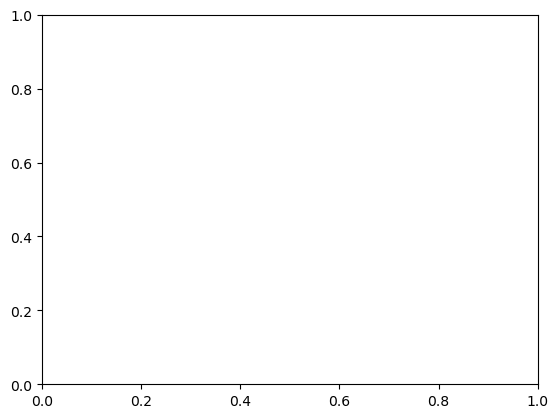

In [64]:
wavelengths = np.array([24, 70, 160, 100, 160, 250, 350, 500])
cols = ['f_MIPS24', 'f_MIPS70', 'f_MIPS160', 'f_PACS100', 'f_PACS160', 'f_SPIRE250', 'f_SPIRE350', 'f_SPIRE500']
cols_err = [f'ferr{in_k[1:]}' for in_k in in_keys]
for i in range(1000):
    plt.errorbar(wavelengths, np.array([fits_data[col][i] for col in cols]), yerr=np.array([fits_data[col_err][i] for col_err in cols_err]))

In [71]:
test = get_np_data_from_fits(os.path.join(PATH_TO_DATA, 'sed_catalog/es1.v1.fits'), out_err_keys, transforms=out_err_tranforms)

Mstar_best_err


In [96]:
in_keys = ['f_MIPS24', 'f_MIPS70', 'f_MIPS160', 'f_PACS100', 'f_PACS160', 'f_SPIRE250', 'f_SPIRE350', 'f_SPIRE500']
in_err_keys = [f'ferr{in_k[1:]}' for in_k in in_keys]
in_transforms = [None for _ in range(len(in_keys))]
out_err_keys = ['Mstar_best_err']
out_keys = ['Mstar_best']
out_transforms = [lambda x: np.log(x)]
out_err_tranforms = [lambda x: np.abs(x / np.exp(cat).flatten())]

cat, cat_ids = get_np_data_from_fits(os.path.join(PATH_TO_DATA, 'sed_catalog/es1.v1.fits'), out_keys, transforms=out_transforms, vector_key='Tractor_ID')
cat_err = get_np_data_from_fits(os.path.join(PATH_TO_DATA, 'sed_catalog/es1.v1.fits'), out_err_keys, transforms=out_err_tranforms)

Mstar_best
Mstar_best_err


<ErrorbarContainer object of 3 artists>

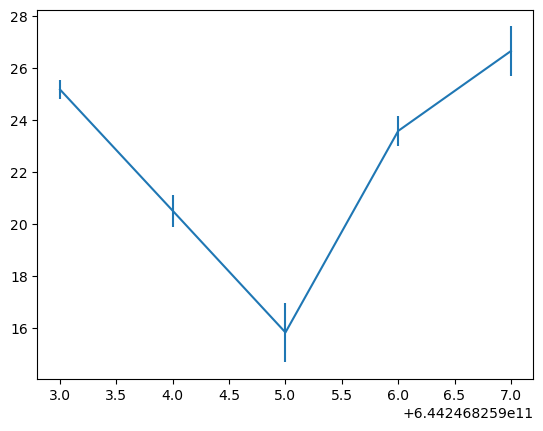

In [98]:

plt.errorbar(cat_ids.flatten()[15:20], cat.flatten()[15:20], yerr=cat_err[15:20].flatten())

In [99]:
cat

array([[22.58654863],
       [22.70666103],
       [23.72381534],
       ...,
       [22.67385655],
       [21.06247981],
       [19.02636759]])

In [100]:
cat_err[:100]

array([[  0.60894281],
       [  1.23293845],
       [ 26.80979109],
       [  0.79035562],
       [  1.10848702],
       [ 26.80979109],
       [ 26.80979109],
       [ 26.80979109],
       [  3.267223  ],
       [  2.12437502],
       [  1.35788318],
       [  0.51827455],
       [  0.39545777],
       [  0.48227421],
       [  4.33416808],
       [  0.36899398],
       [  0.61319421],
       [  1.14895759],
       [  0.58666171],
       [  0.95028189],
       [  0.71332358],
       [  1.57308315],
       [  0.74818421],
       [  0.40094254],
       [  0.453872  ],
       [  0.47981076],
       [125.6802216 ],
       [  2.0925956 ],
       [  0.78024407],
       [  0.47640721],
       [  0.50054043],
       [  0.3459964 ],
       [  0.43815015],
       [  0.90286473],
       [  0.32769286],
       [  1.05638794],
       [  0.42184437],
       [  1.69939049],
       [  1.29058491],
       [165.26610777],
       [  0.86939799],
       [  3.76933339],
       [  1.62155671],
       [  1

In [93]:
t = fits.open(os.path.join(PATH_TO_DATA, 'sed_catalog/es1.v1.fits'))

[(644246851693,  9.71018059, -44.03439074, 5.558, 'zphot',   1.333,   5.704, 0, -1, -1, -1, -1, 0, -3.29583861, nan, -2.05357512, nan, 0.32727238, nan, nan, 0.32727238, 6.44485922e+09, 3.92455071e+09, nan, nan, nan, nan, 6.44485922e+09, 3.92455071e+09, 0.        ,  6.99390612, 2.90585871e+01, 1.78030653e+01, nan, nan, nan, nan, 2.90585871e+01, 1.78030653e+01, 0.        ,  0.4623226 , nan, nan, 0.03444344, 0.25050409, 0.51512901, 0.1759817 , 0.84628091, 0.37661203, 0., -1., nan, 1., -1.,  1.)
 (644246851702,  8.72865681, -44.03237411, 3.067, 'zphot',   2.539,   3.673, 0, -1, -1, -1, -1, 0, -4.76697597, nan, -1.33927739, nan, 0.27275343, nan, nan, 0.27275343, 7.26737532e+09, 8.96022646e+09, nan, nan, nan, nan, 7.26737532e+09, 8.96022646e+09, 0.50339431,  9.70630534, 2.59263310e+01, 1.58536094e+01, nan, nan, nan, nan, 2.59263310e+01, 1.58536094e+01, 0.1028234 ,  0.99282437, nan, nan, 0.69749461, 0.31851403, 0.66980577, 0.16984261, 1.62264179, 0.25883051, 0., -1., nan, 1., -1.,  1.)
 (6442

In [95]:
t[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  401 / length of dimension 1                          
NAXIS2  =               826242 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   55 / number of table fields                         
TTYPE1  = 'Tractor_ID'                                                          
TFORM1  = 'K       '                                                            
TTYPE2  = 'RA      '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'DEC     '        

In [104]:
import pickle
pickle_path = os.path.join(os.getcwd(), 'es1_data')
with open(pickle_path, 'wb') as fp:
	        pickle.dump(np.array([1,2]), fp)

In [106]:
from logger import get_clean_logger
LOG = get_clean_logger(logger_name = 'testing')

In [107]:
x = np.array([[1,2], [2,2]])
LOG.info('shape = \t%s', x.shape)

2023-10-02 17:32:21,322 - testing - INFO - shape = 	(2, 2)


In [116]:
import astropy.units as u

def ab_mag_to_flux(AB_mag: np.ndarray) -> np.ndarray:
    return np.exp((AB_mag - 8.9) / -2.5) / 1000

In [118]:
def impute(data: np.ndarray) -> np.ndarray:
    imputer = KNNImputer(n_neighbors=5)
    return imputer.fit_transform(data.T).T

In [119]:
impute(np.array([[1,2], [None, None], [2,3]]))

array([[1., 2.],
       [2., 3.]])

In [126]:
ab_mag_to_flux(np.array([10,2]))
t1 = np.array([[1,2,3], [4,5,6]])
t2 = np.array([[1,1,1], [2,np.nan,2]])
t3 = np.concatenate((t1, t2))
print(t3)
rows_with_nan = t3[np.any(np.isnan(t3), axis=1)]
print('here', rows_with_nan)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 1.  1.  1.]
 [ 2. nan  2.]]
here [[ 2. nan  2.]]


In [128]:
# Sample numpy array
arr = np.array([[1, 2, 3],
                [4, np.nan, 6],
                [7, 8, 9],
                [np.nan, np.nan, 12]])

# Get indices of rows that contain at least one nan value
indices_with_nan = np.where(np.any(np.isnan(arr), axis=1))[0]

print(indices_with_nan)

[1 3]


In [121]:
test = np.array([1,2,np.nan])
np.count_nonzero(np.isnan(test))

1

U (Ultraviolet): ~365 nm (though this can vary significantly based on the specific system)
G (Green): ~480 nm
R (Red): ~640 nm
I (Infrared): ~800 nm

In [ ]:
wavelengths = np.array([24, 70, 160, 100, 160, 250, 350, 500])
cols = ['f_MIPS24', 'f_MIPS70', 'f_MIPS160', 'f_PACS100', 'f_PACS160', 'f_SPIRE250', 'f_SPIRE350', 'f_SPIRE500']

wl_mag = [3.6, 4.5, 152.8, 227.1, 365, 480, 640, 800]
cols_mag = ['mag_CH1', 'mag_CH2', 'mag_FUV', 'mag_NUV', 'mag_U', 'mag_G', 'mag_R', 'mag_I']

In [129]:
with open('/Users/adamboesky/Research/ay98/preprocessed_data/es1_preprocessed.pkl', 'rb') as f:
    es1_data = pickle.load(f)
print(es1_data)

{'photometry': {'sorted_filters': ['f_PACS100', 'f_PACS160', 'f_SPIRE250', 'f_SPIRE350', 'mag_U_VOICE', 'mag_G_DES', 'f_SPIRE500', 'mag_R_DES', 'mag_I_DES', 'mag_Z_VIDEO', 'mag_Z_DES', 'mag_Y_DES', 'mag_Y_VIDEO', 'mag_J_VIDEO', 'mag_H_VIDEO', 'mag_Ks_VIDEO', 'mag_CH1', 'mag_CH2', 'f_MIPS24', 'f_MIPS70', 'f_MIPS160'], 'err_keys': ['magerr_Ks_VIDEO', 'magerr_CH1', 'magerr_CH2', 'ferr_MIPS24', 'ferr_MIPS70', 'ferr_MIPS160', 'ferr_PACS100', 'ferr_SPIRE350', 'ferr_PACS160', 'ferr_SPIRE250', 'ferr_SPIRE500', 'magerr_U_VOICE', 'magerr_R_DES', 'magerr_I_DES', 'magerr_G_DES', 'magerr_Z_DES', 'magerr_Y_DES', 'magerr_Z_VIDEO', 'magerr_Y_VIDEO', 'magerr_J_VIDEO', 'magerr_H_VIDEO'], 'sorted_wavelengths': [100, 160, 250, 350, 365, 480, 500, 640, 800, 900, 920, 1000, 1020, 1250, 1630, 2190, 3560, 4510, 24000, 70000, 160000], 'data': array([[1.33910495, 2.47982356, 1.52981105, ..., 2.00657586, 3.5884444 ,
        1.66951569],
       [1.18063741, 9.33204362, 6.89417873, ..., 2.16295205, 2.47293949,
   

[]

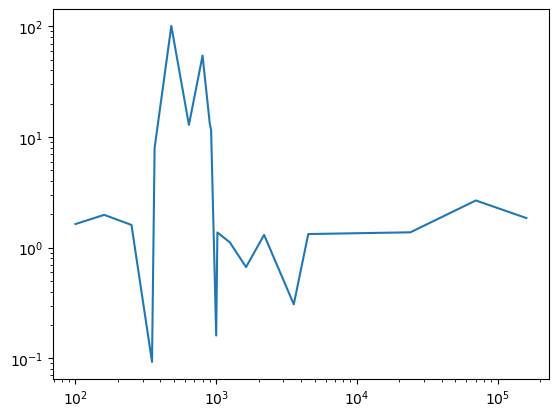

In [131]:
plt.plot(es1_data['photometry']['sorted_wavelengths'], es1_data['photometry']['data'][100])
plt.loglog()

In [133]:
for name in ('es1', 'wcdfs', 'xmmlss'):
    print(name, len(np.array(fits.open(os.path.join(PATH_TO_DATA, f'photometry/{name}_photcat.v1.fits'))[1].data)))


es1 826242
wcdfs 799607
xmmlss 1247954
